#Profitability Analysis – Global Superstore
This project explores the profit dynamics of a global retailer through sales, customer behavior, and discounting patterns. It combines Python-based data analysis, data visualization, and business storytelling to deliver actionable insights.


## Project Highlights

- Segmented customers by purchase frequency and measured profitability
- Identified high-risk products requiring volume to break even
- Quantified the financial impact of discounting on profit margins
- Highlighted top-performing customer segments, products, and regions

#Customer Analysis


In [12]:
# data opp librarys
import numpy as np
import pandas as pd

# visual libraries
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/My Drive/Global_Superstore2.csv", encoding='ISO-8859-1')
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,31-07-2012,31-07-2012,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.650,7,0.0,762.1845,933.57,Critical
1,26341,IN-2013-77878,05-02-2013,07-02-2013,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.395,9,0.1,-288.7650,923.63,Critical
2,25330,IN-2013-71249,17-10-2013,18-10-2013,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.171,9,0.1,919.9710,915.49,Medium
3,13524,ES-2013-1579342,28-01-2013,30-01-2013,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.510,5,0.1,-96.5400,910.16,Medium
4,47221,SG-2013-4320,05-11-2013,06-11-2013,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.960,8,0.0,311.5200,903.04,Critical


In [13]:
#check the schema

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [14]:
#convert colum 2 "Order Date" and colum 3 "Ship Date" to datetime

# swich format to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

df.info()

<ipython-input-14-573944749>:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Order Date'] = pd.to_datetime(df['Order Date'])
<ipython-input-14-573944749>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Ship Date'] = pd.to_datetime(df['Ship Date'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

#Profile the customers based on their frequency of purchase

In [15]:
#Profile the customers based on their frequency of purchase

# Calculate frequency of purchase for each customer
frequency_df = df.groupby(['Customer ID', 'Customer Name'])['Order ID'].nunique().reset_index()
frequency_df.columns = ['Customer ID', 'Customer Name', 'Frequency']

# Print the frequency of purchase for each customer
frequency_df.head()

,Customer ID,Customer Name,Frequency
0,AA-10315,Alex Avila,19
1,AA-10375,Allen Armold,23
2,AA-10480,Andrew Allen,20
3,AA-10645,Anna Andreadi,36
4,AA-315,Alex Avila,7


#Are high-frequency customers contributing more revenue?

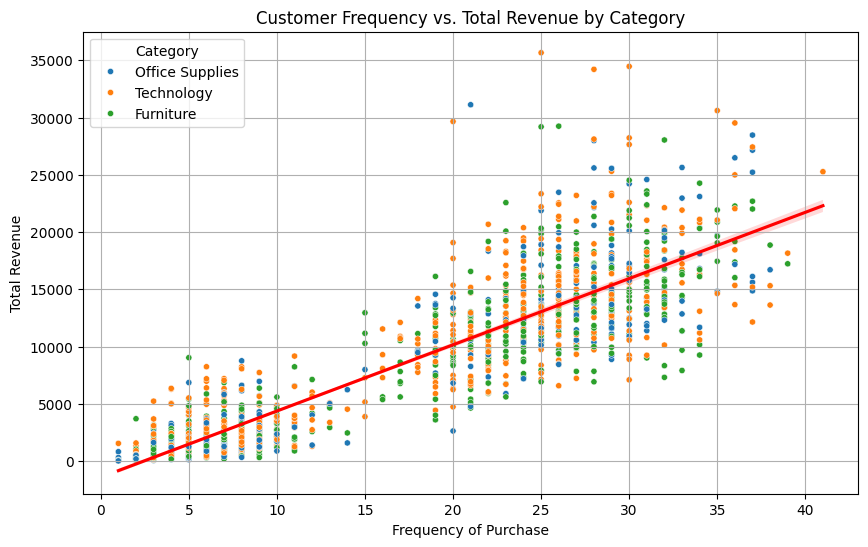

In [16]:
# Are high-frequency customers contributing more revenue?

# Calculate the total revenue for each customer
revenue_df = df.groupby(['Customer ID', 'Customer Name'])['Sales'].sum().reset_index()
revenue_df.columns = ['Customer ID', 'Customer Name', 'Total Revenue']

# Calculate frequency of purchase for each customer
frequency_df = df.groupby(['Customer ID', 'Customer Name'])['Order ID'].nunique().reset_index()
frequency_df.columns = ['Customer ID', 'Customer Name', 'Frequency']

# Get the Category for each customer from the original dataframe
customer_category = df.groupby(['Customer ID', 'Customer Name'])['Category'].first().reset_index()

# Merge frequency, revenue, and category dataframes
customer_analysis_df = pd.merge(frequency_df, revenue_df, on=['Customer ID', 'Customer Name'])
customer_analysis_df = pd.merge(customer_analysis_df, customer_category, on=['Customer ID', 'Customer Name'])

# Create the scatterplot with color based on 'Category'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_analysis_df, x='Frequency', y='Total Revenue', hue='Category', s=20)

# Add a red trend line
sns.regplot(data=customer_analysis_df, x='Frequency', y='Total Revenue', scatter=False, color='red')

plt.title('Customer Frequency vs. Total Revenue by Category')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

This scatter plot examines the relationship between customer purchase frequency and total revenue, color-coded by product category. A positive trend emerges, suggesting that repeat customers often generate more revenue.

Customer Frequency vs. Total Revenue by Category
Insight:
This scatter plot shows a positive correlation between how frequently customers purchase and the total revenue they generate. Customers who buy more often tend to spend more, which is visually supported by the upward red trend line.


#Are high-frequency customers contributing more profit?

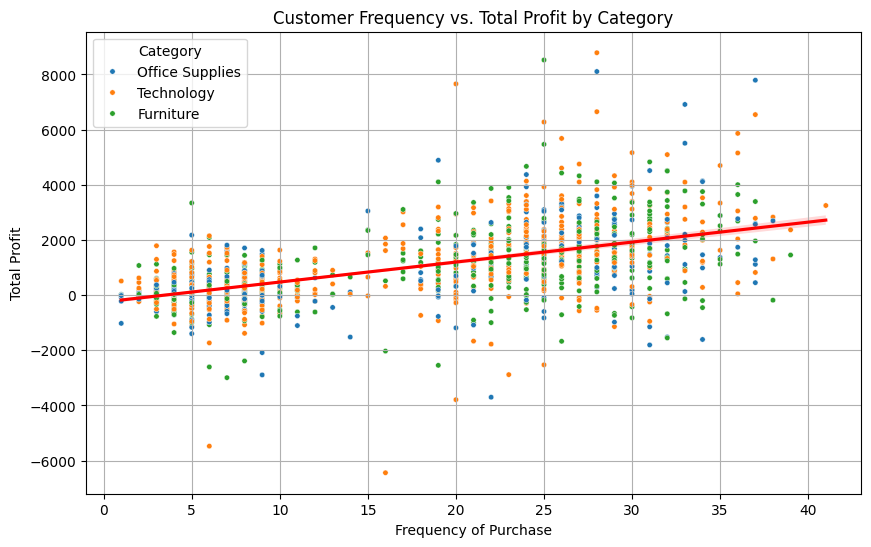

In [17]:
#Are high-frequency customers contributing more profit?

# Calculate the total profit for each customer
profit_df = df.groupby(['Customer ID', 'Customer Name'])['Profit'].sum().reset_index()
profit_df.columns = ['Customer ID', 'Customer Name', 'Total Profit']

# Merge frequency and profit dataframes
customer_profit_analysis_df = pd.merge(frequency_df, profit_df, on=['Customer ID', 'Customer Name'])

# Merge with the category information
customer_profit_analysis_df = pd.merge(customer_profit_analysis_df, customer_category, on=['Customer ID', 'Customer Name'])

# Create the scatterplot with color based on 'Category'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_profit_analysis_df, x='Frequency', y='Total Profit', hue='Category', s=15) # s controls point size

# Add a red trend line (using linear regression)
sns.regplot(data=customer_profit_analysis_df, x='Frequency', y='Total Profit', scatter=False, color='red')

plt.title('Customer Frequency vs. Total Profit by Category')
plt.xlabel('Frequency of Purchase')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

Insight:
There is a clear trend: customers who order more frequently tend to be more profitable. The Low frequency group actually operates at a slight loss on average, while the Very High frequency group delivers a healthy profit margin. This reinforces the strategic value of cultivating repeat buyers and may justify investments in loyalty programs, retention efforts, or exclusive upsells for high-frequency segments.

Why It Matters:
This segmentation goes beyond total profit and examines efficiency. It helps uncover which types of customers actually drive profitability, an important  insight for sustainable growth and resource allocation. This demonstrates that we should be focusing on very high end purchases and dicuraging low frequancy buyers


*** we will explore this further in the "deep dive into profit loss" section ***

#what customers are the most profitable?

Most Profitable Customers:


<ipython-input-18-2212992783>:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_10_profitable_customers['Customer Name'], rotation=45, ha='right')


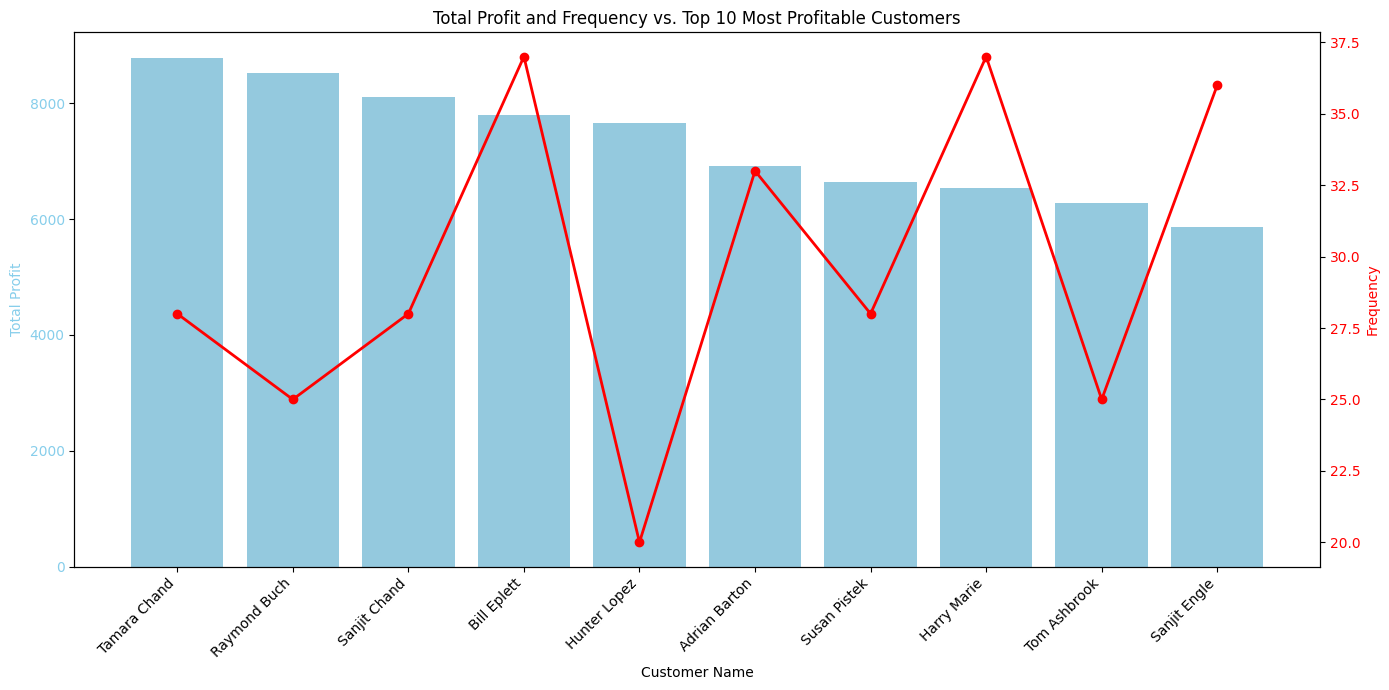

In [18]:
#what customers are the most profitable?


# Calculate total profit for each customer
customer_profit = df.groupby(['Customer ID', 'Customer Name'])['Profit'].sum().reset_index()
customer_profit.columns = ['Customer ID', 'Customer Name', 'Total Profit']

# Merge with frequency data
customer_profit_frequency = pd.merge(customer_profit, frequency_df, on=['Customer ID', 'Customer Name'])

# Sort by total profit to find the most profitable customers
most_profitable_customers = customer_profit_frequency.sort_values(by='Total Profit', ascending=False)

# Display the most profitable customers in a dataframe
print("Most Profitable Customers:")
most_profitable_customers.head(10)

# Get the top 10 most profitable customers for the bar chart
top_10_profitable_customers = most_profitable_customers.head(10)

# Create a bar chart showing Total Profit vs Frequency for the top 10 customers
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Total Profit on the primary y-axis
sns.barplot(x='Customer Name', y='Total Profit', data=top_10_profitable_customers, ax=ax1, color='skyblue')
ax1.set_xlabel('Customer Name')
ax1.set_ylabel('Total Profit', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xticklabels(top_10_profitable_customers['Customer Name'], rotation=45, ha='right')

# Create a secondary y-axis for Frequency
ax2 = ax1.twinx()
ax2.plot(top_10_profitable_customers['Customer Name'], top_10_profitable_customers['Frequency'], color='red', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Frequency', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Total Profit and Frequency vs. Top 10 Most Profitable Customers')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Top 10 Most Profitable Customers
Insight:
This dual-axis visualization displays the top 10 most profitable customers, combining profit (bar) and purchase frequency (line). It highlights that some customers bring high profit with few purchases, while others offer both volume and margin — valuable information for targeting loyalty or upsell efforts.


another intresting segmant are those who buy singal large purchases, regardless of frequency

#Which customer segment defined by coustomer type, is most profitable in each year?

In [19]:
# Which customer segment defined by coustomer type, is most profitable in each year?

# Extract year from 'Order Date'
df['Order Year'] = df['Order Date'].dt.year

# Group by year and segment, then sum profit
yearly_segment_profit = df.groupby(['Order Year', 'Segment'])['Profit'].sum().reset_index()

# Find the segment with the maximum profit for each year
most_profitable_segment_per_year = yearly_segment_profit.loc[yearly_segment_profit.groupby('Order Year')['Profit'].idxmax()]

print("Most profitable customer segment in each year:")
print(most_profitable_segment_per_year)


Most profitable customer segment in each year:
   Order Year   Segment        Profit
0        2011  Consumer  117337.49406
3        2012  Consumer  165799.19094
6        2013  Consumer  208427.73398
9        2014  Consumer  257675.36308


#Which are the top 5 profit-making product types on a yearly basis?

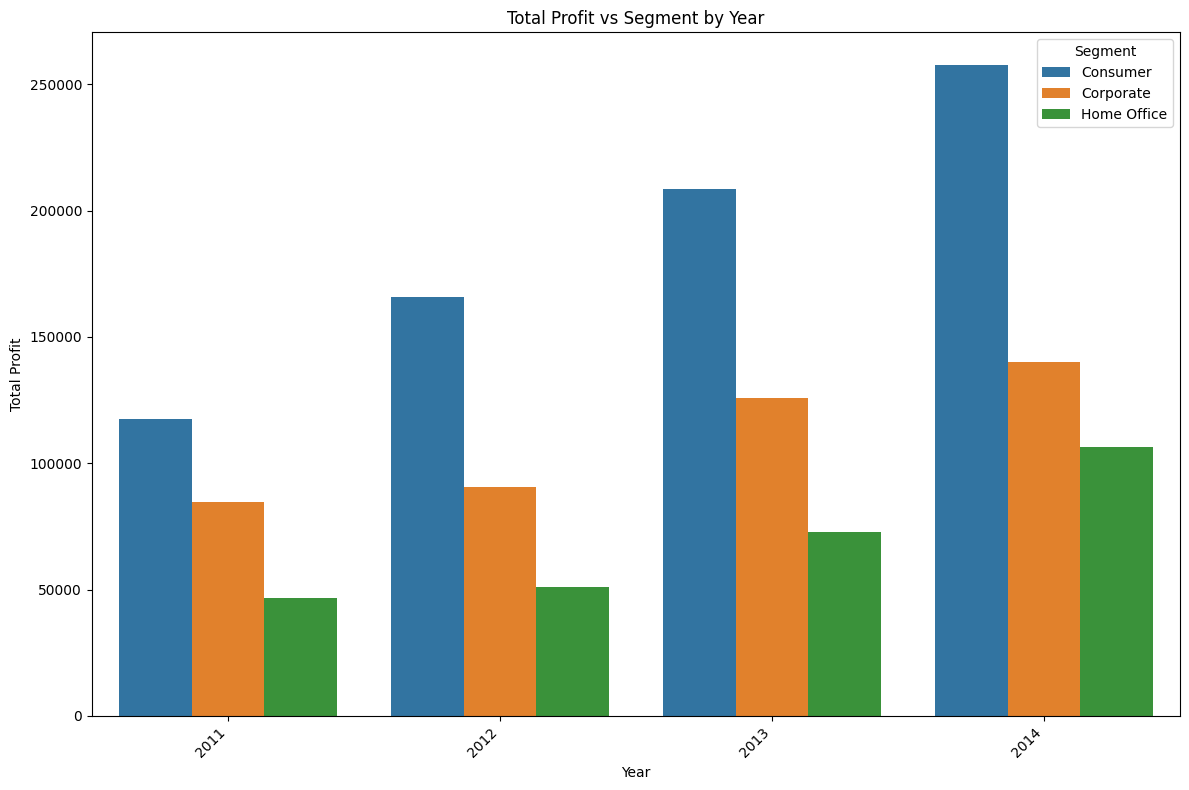

In [20]:
#total profit vs segmant by year

# Extract the year from the 'Order Date' column
df['Order Year'] = df['Order Date'].dt.year

# Group by year and segment and sum the profit
profit_by_year_segment = df.groupby(['Order Year', 'Segment'])['Profit'].sum().reset_index()

# Create a stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(data=profit_by_year_segment, x='Order Year', y='Profit', hue='Segment')

plt.title('Total Profit vs Segment by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Segment')
plt.tight_layout()
plt.show()

Profit by Customer Segment Over the Years
Insight:
This grouped bar chart shows yearly profit by customer segment. The Consumer segment consistently leads in profitability, making it a strategic focus area. Corporate is a steady performer, while Home Office shows lower returns.

#how are the customers distributed across the countries?

Customer Distribution by Country:
                Country  Number of Customers
139       United States                  793
44               France                  679
81               Mexico                  670
6             Australia                  660
47              Germany                  582
26                China                  549
138      United Kingdom                  529
57                India                  494
17               Brazil                  472
58            Indonesia                  469
133              Turkey                  463
63                Italy                  376
119               Spain                  337
94              Nigeria                  332
35   Dominican Republic                  303
38          El Salvador                  299
30                 Cuba                  296
54             Honduras                  279
101         Philippines                  275
59                 Iran                  259


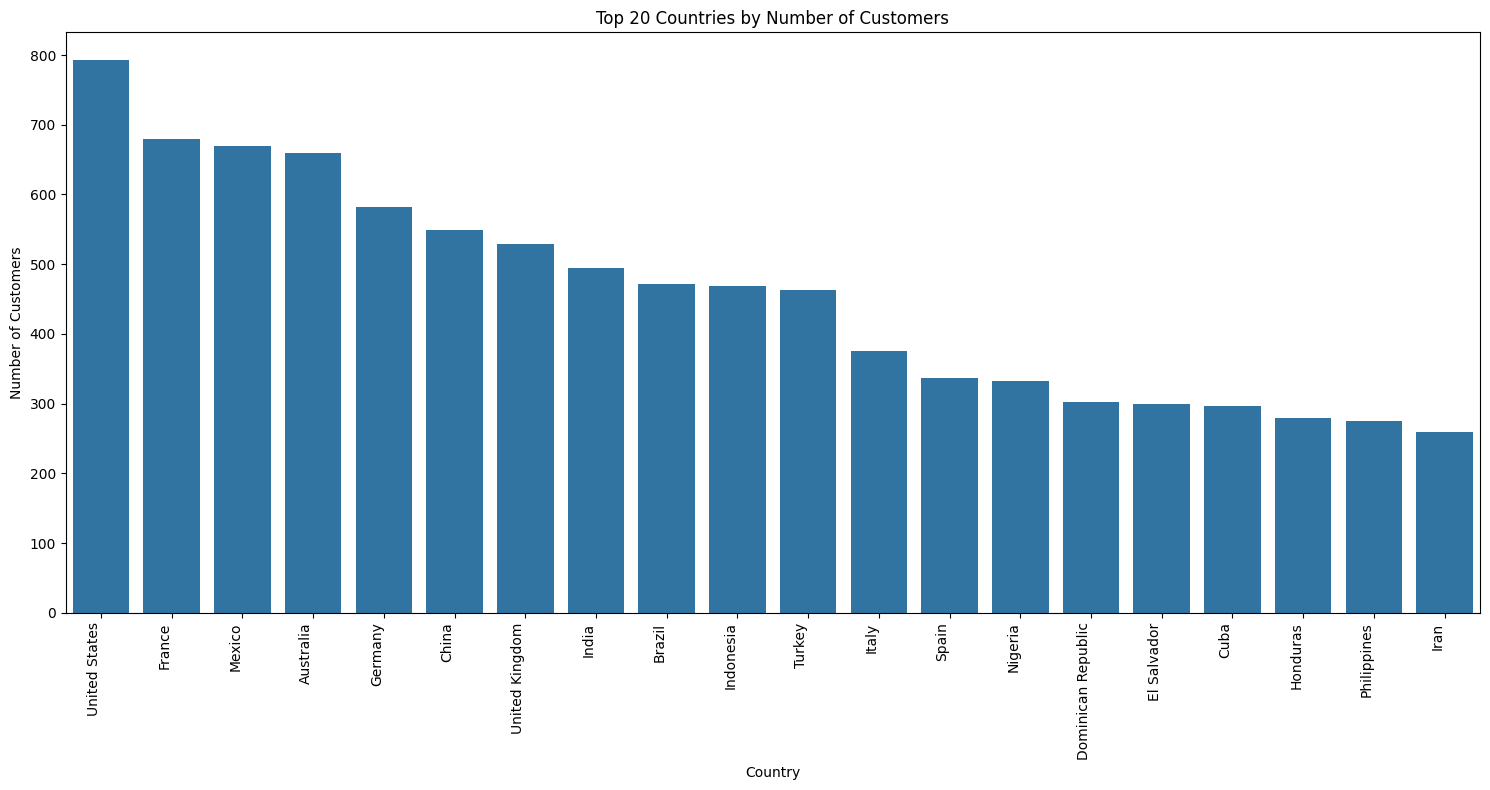

In [23]:
#how are the customers distributed across the countries?

# Group by Country and count the number of unique Customer IDs
customer_distribution_by_country = df.groupby('Country')['Customer ID'].nunique().reset_index()
customer_distribution_by_country.columns = ['Country', 'Number of Customers']

# Sort by the number of customers in descending order to see the top countries
customer_distribution_by_country = customer_distribution_by_country.sort_values(by='Number of Customers', ascending=False)

# Display the distribution
print("Customer Distribution by Country:")
print(customer_distribution_by_country.head(20)) # Displaying top 20 countries for brevity

# Create a bar plot for the top countries
plt.figure(figsize=(15, 8))
top_n_countries = 20
sns.barplot(data=customer_distribution_by_country.head(top_n_countries), x='Country', y='Number of Customers')
plt.title(f'Top {top_n_countries} Countries by Number of Customers')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#total profit per country

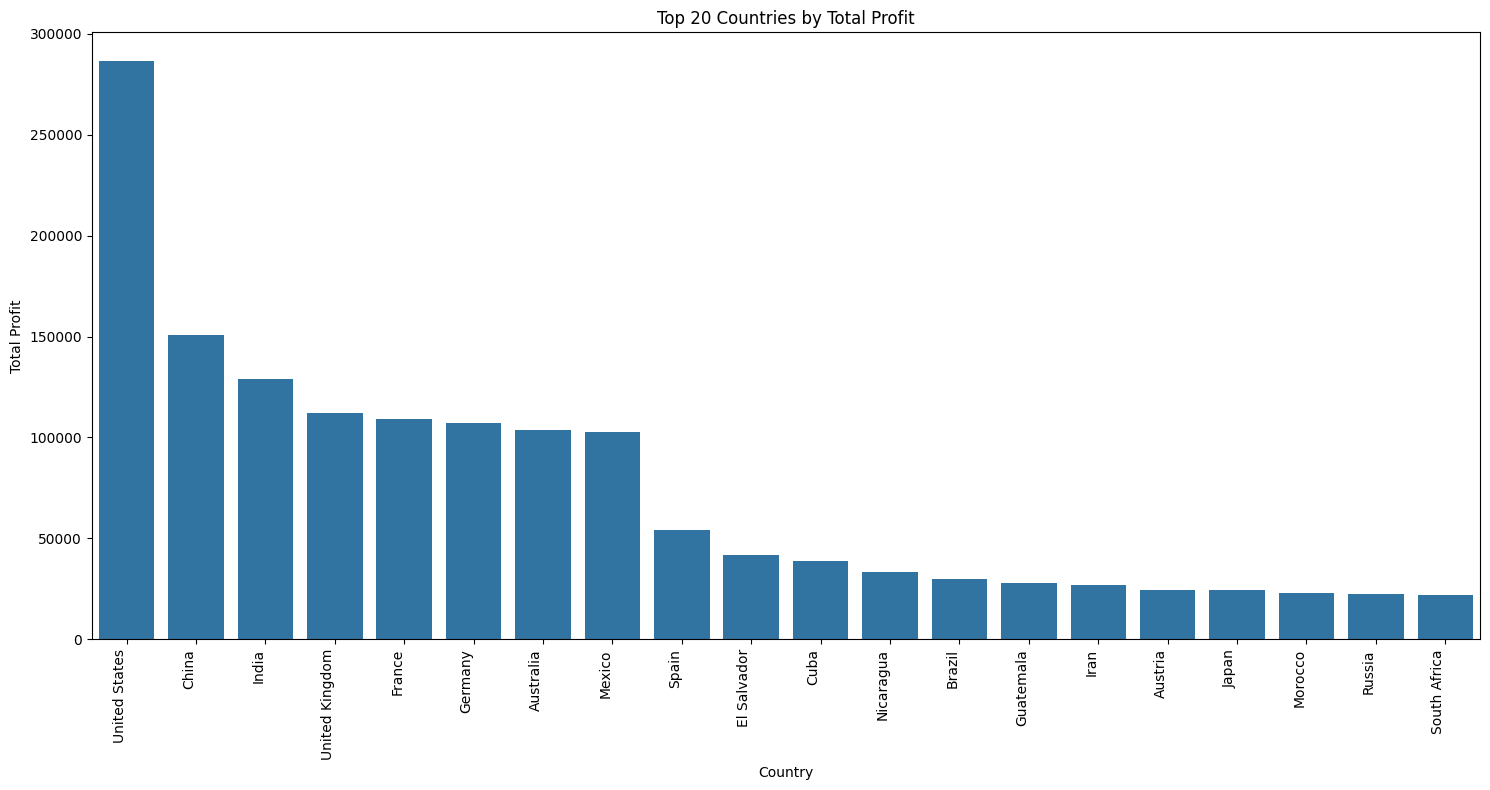

In [26]:
# bar chart for total profit per country

# Calculate total profit by country
country_profit = df.groupby('Country')['Profit'].sum().reset_index()

# Sort by profit in descending order and get the top 20
top_20_countries_profit = country_profit.sort_values(by='Profit', ascending=False).head(20)

# Create a bar chart for the top 20 countries by total profit
plt.figure(figsize=(15, 8))
sns.barplot(data=top_20_countries_profit, x='Country', y='Profit')
plt.title('Top 20 Countries by Total Profit')
plt.xlabel('Country')
plt.ylabel('Total Profit')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

#Which country has top sales?

The country with the top sales is: United States with sales of 2297200.86


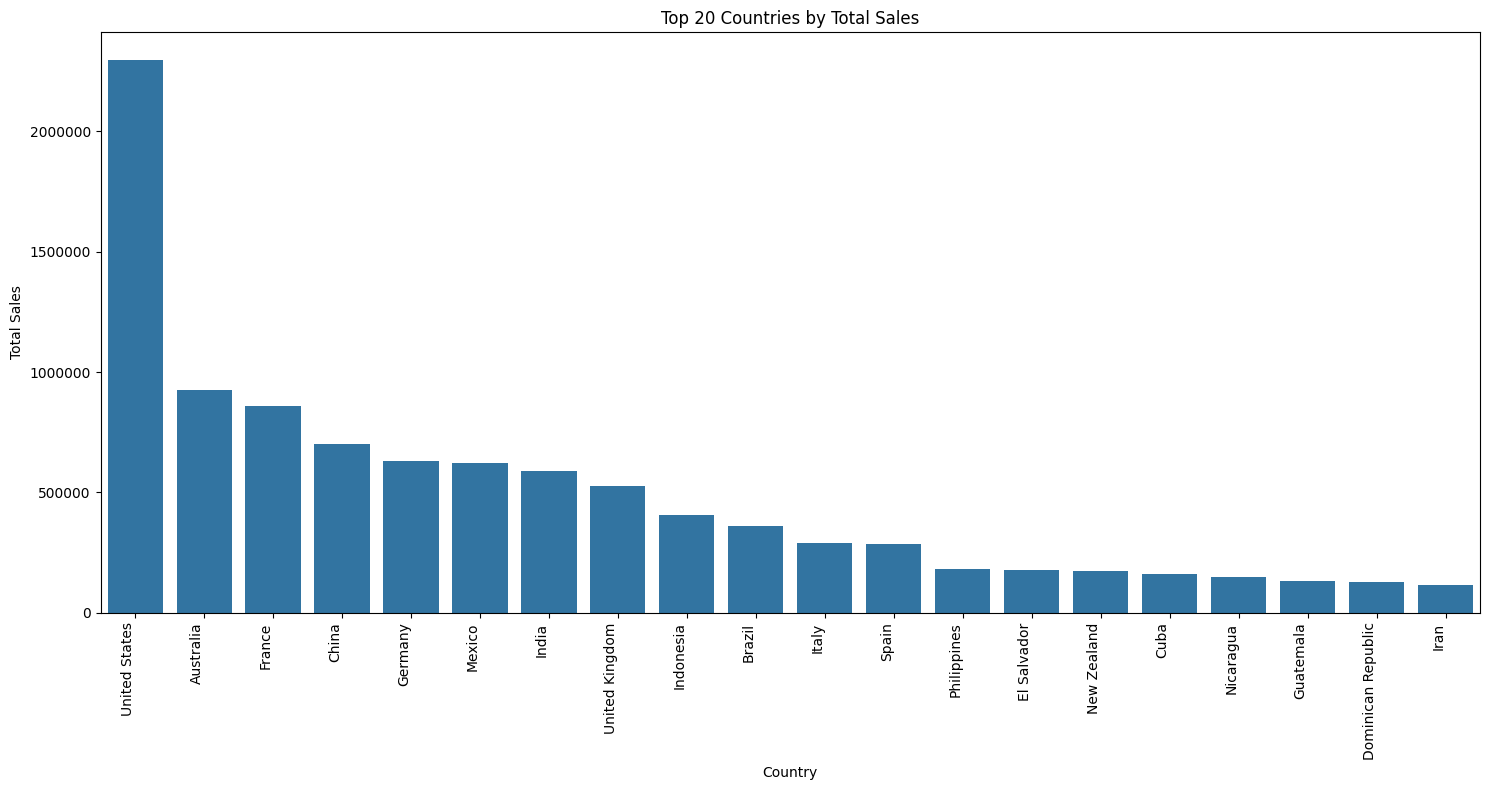

In [52]:
# Which country has the top sales?

# Calculate total sales by country
country_sales = df.groupby('Country')['Sales'].sum().reset_index()

# Sort by sales in descending order
top_countries_sales = country_sales.sort_values(by='Sales', ascending=False)

# Get the top country
top_country = top_countries_sales.iloc[0]

print(f"The country with the top sales is: {top_country['Country']} with sales of {top_country['Sales']:.2f}")

# Create a bar chart for the top countries by total sales
plt.figure(figsize=(15, 8))
# Select the top 20 countries for visualization (you can adjust this number)
sns.barplot(data=top_countries_sales.head(20), x='Country', y='Sales')
plt.title('Top 20 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=90, ha='right')
plt.ticklabel_format(style='plain', axis='y') # Prevent scientific notation on y-axis
plt.tight_layout()
plt.show()

#deep dive into profit loss

In [28]:
customer_summary = df.groupby('Customer ID').agg({
    'Sales': 'sum',
    'Profit': 'sum',
    'Order ID': 'nunique'
}).rename(columns={'Sales': 'Total Revenue', 'Profit': 'Total Profit', 'Order ID': 'Order Count'})

# Calculate profit margin
customer_summary['Profit Margin'] = customer_summary['Total Profit'] / customer_summary['Total Revenue']

# Define frequency buckets
customer_summary['Frequency Bucket'] = pd.qcut(customer_summary['Order Count'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Calculate average profit margin across frequency buckets
bucket_margin = customer_summary.groupby('Frequency Bucket')['Profit Margin'].mean().reset_index()
bucket_margin

<ipython-input-28-4182612365>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_margin = customer_summary.groupby('Frequency Bucket')['Profit Margin'].mean().reset_index()


,Frequency Bucket,Profit Margin
0,Low,-0.006028
1,Medium,0.061802
2,High,0.116779
3,Very High,0.117114


Profit Margin by Customer Frequency,
This explores the relationship between purchase frequency and profitability by calculating the average profit margin across different customer frequency buckets. Customers were grouped into four segments Low, Medium, High, and Very High, based on the number of unique orders they placed.

we can see discounts on low volume sales are cutting into our profits


In [35]:
#function that returns the minimum "quantity" of an item we need to sell to make a profit.
#ordered it by "Minimum Profit Quantity"

def minimum_profit_quantity(df):

  # Calculate cumulative profit for each product and quantity combination
  df_sorted = df.sort_values(by=['Product Name', 'Quantity'])
  df_sorted['Cumulative Profit'] = df_sorted.groupby('Product Name')['Profit'].cumsum()

  # Find the first quantity where cumulative profit becomes positive for each product
  min_quantity_for_profit = df_sorted[df_sorted['Cumulative Profit'] > 0].groupby('Product Name')['Quantity'].min().reset_index()
  min_quantity_for_profit.columns = ['Product Name', 'Minimum Profit Quantity']

  # Sort the results
  min_quantity_for_profit_sorted = min_quantity_for_profit.sort_values(by='Minimum Profit Quantity', ascending=False)

  return min_quantity_for_profit_sorted

# Apply the function to your dataframe
min_profit_qty_df = minimum_profit_quantity(df)
min_profit_qty_df

,Product Name,Minimum Profit Quantity
1848,Howard Miller 12-3/4 Diameter Accuwave DS Wal...,11
2578,Panasonic KX MB2061 Multifunction Printer,10
260,"Ames Mailers, Recycled",9
2275,Microsoft Natural Keyboard Elite,9
2500,Office Star - Ergonomic Mid Back Chair with 2-...,9
...,...,...
3613,"Xerox Parchment Paper, Multicolor",1
9,1/4 Fold Party Design Invitations & White Enve...,1
8,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",1
7,#6 3/4 Gummed Flap White Envelopes,1


Product-Level Profit Thresholds: Minimum Quantity Needed to Break Even
Building on our earlier discovery — that low-frequency customers often buy heavily discounted, loss-generating items — we took the analysis one step further by asking:

How much of a product must be sold before it becomes profitable?

To answer this, I calculated the Minimum Profit Quantity for each product. This metric identifies the smallest quantity at which a products cumulative profit turns positive.

Why This Matters:
Many low-frequency customers bought exactly these types of products — often in bulk and under discount-heavy promotions.

The fact that some products dont become profitable until 9+ units are sold makes them risky when sold as one-offs to infrequent customers.

This could explain why the "Low Frequency" customer segment has a negative average profit margin (–0.60%).


Strategic Insight:
Not all products are designed for one-time transactions. Some rely on volume to become viable — and are not well-suited for discounting or acquisition offers aimed at low-frequency customers.


Recommendations:
Flag high Minimum Profit Quantity items for bundling or volume-only promotions.

Avoid pushing these products in first-time buyer campaigns.

Include this metric in internal product dashboards to help the business avoid loss-leader pitfalls.

In [32]:
# show frequancy of buyers, pofit, and discounts.

low_frequency_customers = customer_summary[customer_summary['Frequency Bucket'] == 'Low'].index

low_freq_df = df[df['Customer ID'].isin(low_frequency_customers)].copy()

low_freq_profit_sorted = low_freq_df.sort_values(by='Profit', ascending=True)

low_freq_details = low_freq_profit_sorted[['Customer ID', 'Product Name', 'Quantity', 'Discount', 'Profit']]

low_freq_details

,Customer ID,Product Name,Quantity,Discount,Profit
6591,DM-3345,"Motorola Smart Phone, Cordless",12,0.6,-4088.376
245,JC-6105,"Barricks Conference Table, Rectangular",8,0.7,-2750.280
11717,JK-6090,"Breville Microwave, Red",8,0.7,-1472.376
2680,TA-11385,"Office Star Swivel Stool, Adjustable",14,0.6,-1235.052
727,RB-9435,"Cisco Smart Phone, Cordless",6,0.7,-1172.736
...,...,...,...,...,...
72,BW-1065,"Harbour Creations Executive Leather Armchair, ...",8,0.0,1523.520
291,JW-5220,"Cisco Smart Phone, Cordless",6,0.0,1563.480
426,MG-8145,"Cisco Smart Phone, Cordless",6,0.0,1563.480
940,GZ-4545,"Bush Classic Bookcase, Pine",8,0.0,1622.880


Deep Dive:

Why Low-Frequency Customers Are Unprofitable
In the previous analysis, we segmented customers by how often they order and observed a trend: higher frequency correlates with significantly higher profit margins. But what makes low-frequency customers less profitable, and in some cases, loss generating?

To explore this, I isolated the transactions from customers in the "Low" frequency bucket, then sorted their purchases by profitability. The result offers a more granular view of where the losses are coming from.


A clear pattern emerges:

Low-frequency customers tend to purchase heavily discounted, high-quantity items, often at a loss.

Most of the transactions in this segment involve steep discounts (60–70%) and mid to large sized orders, which appears to erode profitability. While some individual orders from this group were profitable, these are outweighed by significant losses.



Infrequent buyers are often attracted by steep promotions, but this strategy can backfire if discounting is too aggressive and not balanced by order volume or customer retention.



Strategic Recommendations:

Reevaluate discount thresholds for one-time or low-frequency customers.

Implement purchase thresholds to unlock deep discounts (e.g., loyalty pricing only after X orders).

Explore targeted re-engagement campaigns to convert low-frequency buyers into repeat customers — shifting them into higher-margin segments.


In [33]:
#total negitive "profits" , and the total number of orders that had negative profits

negative_profit_orders = df[df['Profit'] < 0]

total_negative_profit = negative_profit_orders['Profit'].sum()
total_negative_orders_count = negative_profit_orders.shape[0]

print(f"Total negative profit: {total_negative_profit:.2f}")
print(f"Total number of orders with negative profit: {total_negative_orders_count}")

Total negative profit: -920646.16
Total number of orders with negative profit: 12544


In [34]:
# calculate the total profit lost due to "discounts"

# calculate the total profit on orders that had a discount
profit_with_discount = df[df['Discount'] > 0]['Profit'].sum()

# calculate the total sales on orders that had a discount
sales_with_discount = df[df['Discount'] > 0]['Sales'].sum()

# This doesn't directly give us the "profit lost".
# A common way to interpret "profit lost due to discounts" is the reduction in profit
# compared to a scenario with no discounts. This is difficult to measure precisely without a model
# that predicts profit without discount.

# However, we can look at orders with discounts that resulted in negative profit.
# The profit lost on these orders is the magnitude of the negative profit.
profit_lost_on_negative_profit_discounted_orders = df[(df['Discount'] > 0) & (df['Profit'] < 0)]['Profit'].sum()

print(f"Total profit from orders with discounts: {profit_with_discount:.2f}")
print(f"Total sales from orders with discounts: {sales_with_discount:.2f}")
print(f"Total negative profit on orders with discounts: {profit_lost_on_negative_profit_discounted_orders:.2f}")

# Another perspective on "profit lost" could be the potential profit that was
# foregone due to the discount. This requires estimating what the profit would have been
# without the discount. A simple (but not necessarily accurate) assumption could be
# that the profit margin would have been the average profit margin on non-discounted items.

# Calculate the average profit margin on non-discounted items
average_profit_margin_no_discount = df[df['Discount'] == 0]['Profit'].sum() / df[df['Discount'] == 0]['Sales'].sum()

# Estimate potential profit on discounted orders if there were no discount
# Potential Sales without Discount = Sales / (1 - Discount)
# Estimated Potential Profit = Potential Sales without Discount * average_profit_margin_no_discount
df_discounted = df[df['Discount'] > 0].copy()
df_discounted['Potential Sales No Discount'] = df_discounted['Sales'] / (1 - df_discounted['Discount'])
df_discounted['Estimated Potential Profit No Discount'] = df_discounted['Potential Sales No Discount'] * average_profit_margin_no_discount

# Profit Lost due to Discount = Estimated Potential Profit No Discount - Actual Profit
df_discounted['Estimated Profit Lost'] = df_discounted['Estimated Potential Profit No Discount'] - df_discounted['Profit']

total_estimated_profit_lost = df_discounted['Estimated Profit Lost'].sum()

print(f"Estimated total profit lost due to discounts (based on average non-discounted margin): {total_estimated_profit_lost:.2f}")

# It's important to note that this last calculation is an estimation based on an assumption.
# The actual profit lost could be different depending on how discounts affect sales volume.

Total profit from orders with discounts: -303237.98
Total sales from orders with discounts: 5650090.96
Total negative profit on orders with discounts: -920646.16
Estimated total profit lost due to discounts (based on average non-discounted margin): 2332651.36


Loss Analysis: The Hidden Cost of Discounting
 Negative Profit Orders
A total of 12,544 orders resulted in negative profit, amounting to a net loss of:

$920,646.16

This signals a substantial leak in profitability — a red flag worth deeper exploration. The next question becomes: what's driving these losses?



The estimated $2.33 million in lost profit is based on comparing actual profit to a model of “what could have been” — assuming discounted orders earned the same average profit margin as full-price orders.


Insight:
Discounts may drive volume, but they’re crushing margins — especially when applied to products that already require high quantities to become profitable.

By applying discounts too broadly or deeply:

Products with high minimum profit quantity thresholds (e.g., printers, chairs, tech equipment) are sold at a loss.

These sales are often made to low-frequency customers, who are unlikely to return and make up the margin gap over time.

In other words, the discount strategy is not attracting long-term value, but rather amplifying short-term losses.

Why This Analysis Matters for Stakeholders
Helps finance teams quantify the true cost of discounting.

Equips marketing teams with a clearer picture of which promotions erode profit.

Enables product teams to flag items that are structurally unprofitable unless sold in large quantities.

Supports leadership in making more data-driven decisions around pricing and customer targeting.

Final Recommendations


avoid deep discounts on low-margin items unless bundled or volume-guaranteed
Customer Segmentation	Focus on retaining high-frequency buyers, not acquiring discount-driven one-time purchasers
Product Strategy	Label products with high minimum profit thresholds as “volume-sensitive” and gate them from entry-level offers
Margin Monitoring	Track profit margins by discount tier in real time to prevent invisible losses